<a href="https://colab.research.google.com/github/stevengregori92/Learn-XGBoost/blob/main/Normal_Crab'_Age_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import ML Libraries

In [1]:
!pip install luwiji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.0 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366830 sha256=d84fb6a8deda5590315ac85ff1552edd8c5cdf70390cd363d2f5247d0842e430
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32178 sha256=f69f6b5cd345e092176633dd73c4fece86e0480e971abae63139dd1427f64193
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

#Import Dataset

In [3]:
!gdown https://drive.google.com/uc?id=1uifg9SlvaGXYVxIUJDT8Ru_dXoh6ielM

Downloading...
From: https://drive.google.com/uc?id=1uifg9SlvaGXYVxIUJDT8Ru_dXoh6ielM
To: /content/crab.zip
100% 4.41M/4.41M [00:00<00:00, 162MB/s]


In [4]:
!unzip /content/crab.zip

Archive:  /content/crab.zip
  inflating: train_extended.csv      


In [6]:
df = pd.read_csv('train_extended.csv', index_col='id')
pd.options.display.max_columns=50
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0
...,...,...,...,...,...,...,...,...,...
199995,F,1.8125,1.2750,0.4375,42.141532,20.000572,9.979024,11.609120,11.0
199996,F,0.9875,0.6750,0.2375,7.980384,3.742134,1.913591,2.267960,6.0
199997,M,1.1250,0.9125,0.2875,10.886208,4.904464,1.984465,3.118445,7.0


#Cleaning Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Sex             200000 non-null  object 
 1   Length          200000 non-null  float64
 2   Diameter        200000 non-null  float64
 3   Height          200000 non-null  float64
 4   Weight          200000 non-null  float64
 5   Shucked Weight  200000 non-null  float64
 6   Viscera Weight  200000 non-null  float64
 7   Shell Weight    200000 non-null  float64
 8   Age             200000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 15.3+ MB


,missing_value,%
Sex,0,0.0
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Weight,0,0.0
Shucked Weight,0,0.0
Viscera Weight,0,0.0
Shell Weight,0,0.0
Age,0,0.0


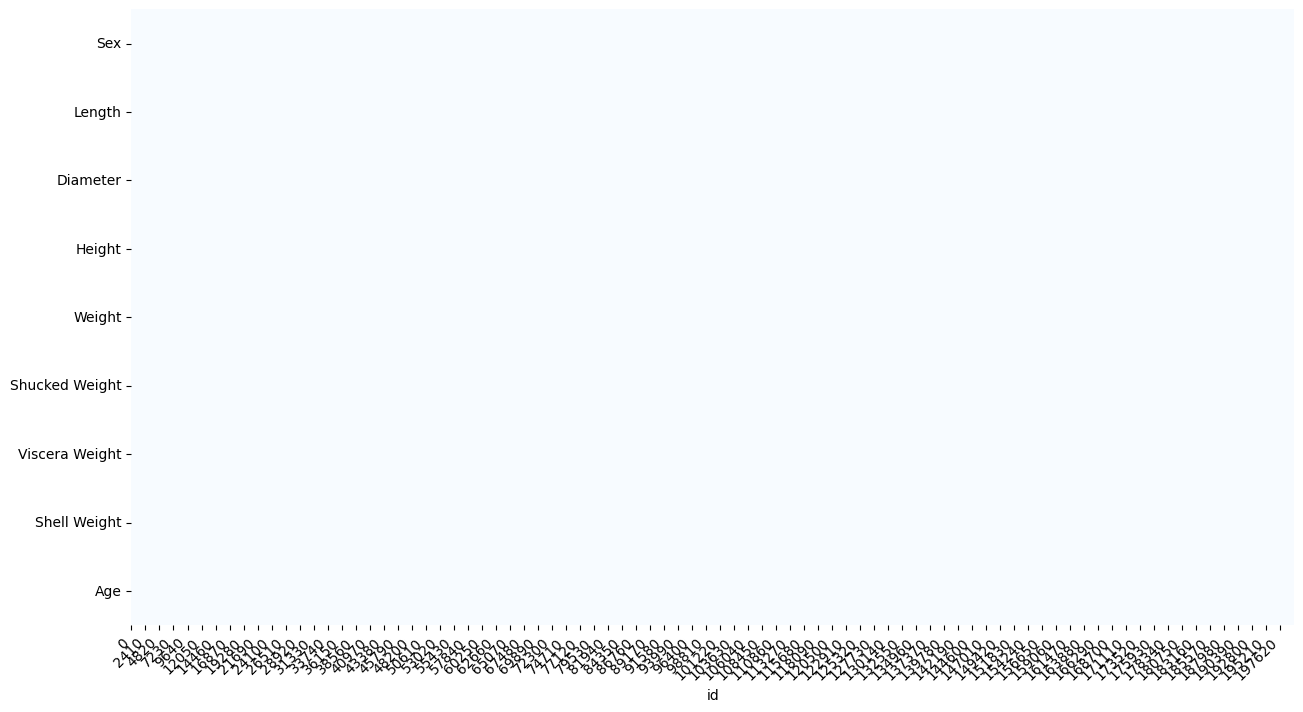

In [8]:
plot_missing_value(df, return_df=True)

In [10]:
df = df[:1000]
df

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
id,,,,,,,,,
0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0
...,...,...,...,...,...,...,...,...,...
995,M,1.4375,1.1375,0.4125,26.804452,10.673587,5.684075,9.071840,10.0
996,M,1.4750,1.1625,0.4125,28.817267,13.139993,6.761356,7.796112,10.0
997,M,1.6125,1.2500,0.4000,35.621147,13.706983,6.959802,10.064072,18.0


In [ ]:
df[age]

#Regression Dataset Splitting

In [11]:
X = df.drop(columns=['Age'])
y = df.Age

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 8), (200, 8), (800,), (200,))

#XGBOOST Regressor

In [12]:
X_train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight'],
      dtype='object')

In [13]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [14]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['Length', 'Diameter', 'Height', 'Weight',
                             'Shucked Weight', 'Viscera Weight', 'Shell Weight']),
    ('categoric', cat_pipe(), ['Sex'])
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBRegressor(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.xgb_params, cv=3, n_iter = 50, n_jobs=-1, verbose=1, random_state = 42)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'algo__colsample_bytree': 0.6024641082463879, 'algo__gamma': 7, 'algo__learning_rate': 0.04764963542138517, 'algo__max_depth': 3, 'algo__n_estimators': 118, 'algo__reg_alpha': 0.8013508750140631, 'algo__reg_lambda': 3.8765111709116367, 'algo__subsample': 0.7435432121325587}
0.6953373531389724 0.5432899721100704 0.6034427075607689
